In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV


# Model training 

In [ ]:
data=pd.read_csv("dataproject2022.csv", sep=';', index_col="ID",  thousands=',')
features = data

In [ ]:
data['Default (y)'].value_counts(normalize=True)

In [9]:
## We want to predict y so it's a classification task, let's use a blackbox model like a random fores, here everything is already one-hot encoded. 

In [28]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Default (y)'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['Default (y)', 'Pred_default (y_hat)', 'PD','Group'] , axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [24]:
feature_list

['Job tenure',
 'Age',
 'Car price',
 'Funding amount',
 'Down payment',
 'Loan duration',
 'Monthly payment',
 'Credit event',
 'Married',
 'Homeowner']

In [9]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [26]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5580, 10)
Training Labels Shape: (5580,)
Testing Features Shape: (1860, 10)
Testing Labels Shape: (1860,)


In [10]:
# Import the model we are using
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

# Performance

In [28]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors


In [32]:

predictions = rf.predict(test_features)

print('Accuracy: %.3f' % accuracy_score(predictions, test_labels))

Accuracy: 0.822


In [46]:
# pd.DataFrame(predictions).value_counts()
pd.DataFrame(test_labels).value_counts()

0    1485
1     375
dtype: int64

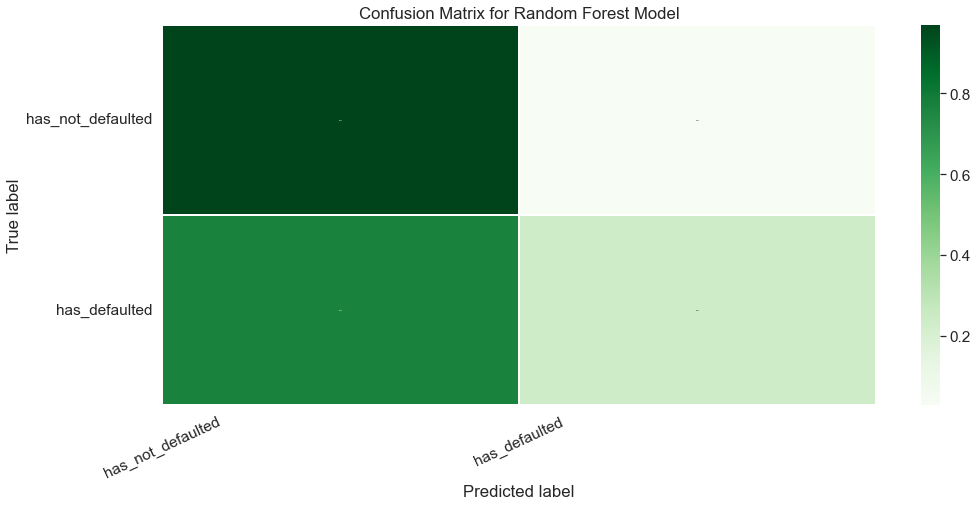

In [48]:

# Get and reshape confusion matrix data
matrix = confusion_matrix(test_labels, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':2},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['has_not_defaulted', 'has_defaulted']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [50]:
print(classification_report(test_labels, predictions))


              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1485
           1       0.66      0.23      0.34       375

    accuracy                           0.82      1860
   macro avg       0.75      0.60      0.62      1860
weighted avg       0.80      0.82      0.79      1860



In [ ]:
## Try with SVC

In [55]:

svc = SVC(random_state=42)
svc.fit(train_features, train_labels)

predictions_svc = svc.predict(test_features)

print('Accuracy: %.3f' % accuracy_score(predictions_svc, test_labels))

Accuracy: 0.798


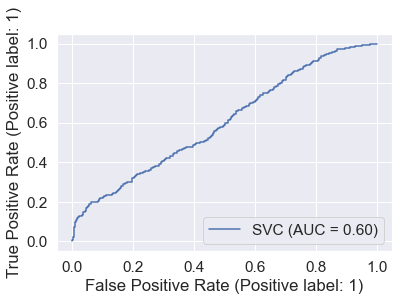

In [57]:
svc_disp = RocCurveDisplay.from_estimator(svc, test_features, test_labels)
plt.show()

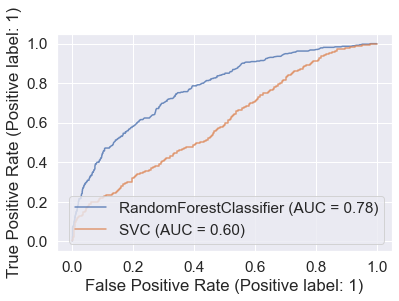

In [58]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf,test_features, test_labels, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [59]:
## We choose the RFC classifier

# Hyperparameter tuning

In [82]:
grid_param ={
    "n_estimators" : [100],
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [5, 10, 20 ],
    "min_samples_leaf" : [5, 10, 20 ],
    "min_samples_split" : [5, 10, 20 ],
    "max_features": ["auto", "log2"]
}

In [83]:
grid_search = GridSearchCV(estimator=rf, param_grid=grid_param, cv=5, n_jobs=-1, verbose=2)

In [84]:
grid_search.fit(train_features, train_labels)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total tim

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100]},
             verbose=2)

In [86]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
best_params = {'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 1000}

 

In [18]:
rf_tuned = RandomForestClassifier(criterion="gini", max_depth=10, max_features='auto', min_samples_leaf=5, min_samples_split=5, n_estimators=100)
rf_tuned.fit(train_features, train_labels)
predictions_tuned = rf_tuned.predict(test_features)

print('Accuracy: %.3f' % accuracy_score(predictions_tuned, test_labels))

Accuracy: 0.823


# Global interpretability: Implement one or two surrogate method(s) to interpret your own model

In [20]:
from sklearn.inspection import PartialDependenceDisplay
disp1 = PartialDependenceDisplay.from_estimator(rf_tuned, features, [0, 1])


['Job tenure',
 'Age',
 'Car price',
 'Funding amount',
 'Down payment',
 'Loan duration',
 'Monthly payment',
 'Credit event',
 'Married',
 'Homeowner']

<AxesSubplot:>

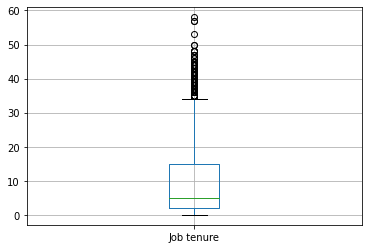

In [34]:
data.boxplot('Job tenure')

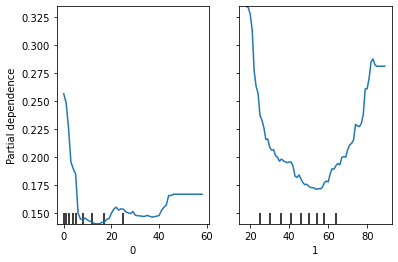

In [30]:
disp1 = PartialDependenceDisplay.from_estimator(rf_tuned, features, [0, 1])
